In [6]:
import io
import pandas as pd
import requests

In [7]:
df = pd.read_csv("C:/uber_data.csv")

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [10]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [13]:
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [14]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index

# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In [15]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [16]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

# rate_code_dim.head()

In [17]:
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [18]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']] 


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [19]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [20]:
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [21]:
payment_type_dim.columns

Index(['payment_type_id', 'payment_type', 'payment_type_name'], dtype='object')

In [22]:
fact_table.columns

Index(['trip_id', 'VendorID', 'datetime_id', 'passenger_count_id',
       'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag',
       'pickup_location_id', 'dropoff_location_id', 'payment_type_id',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [23]:
fact_table

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,99995,99995,99995,99995,N,99995,99995,99995,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,99996,1,99996,99996,99996,99996,N,99996,99996,99996,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,99997,1,99997,99997,99997,99997,N,99997,99997,99997,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,99998,2,99998,99998,99998,99998,N,99998,99998,99998,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set(style="whitegrid")

In [ ]:
# 1. Distribution of Trip Distance

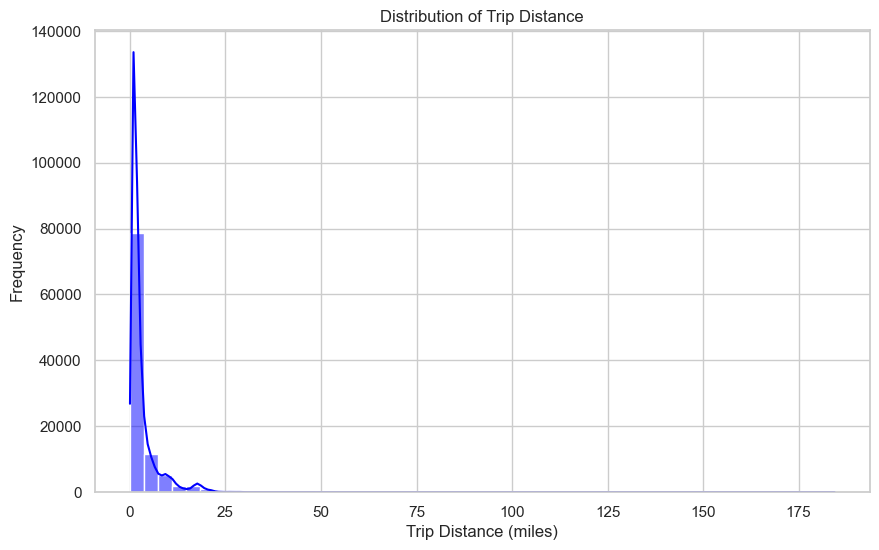

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='blue')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 2. Distribution of Fare Amount

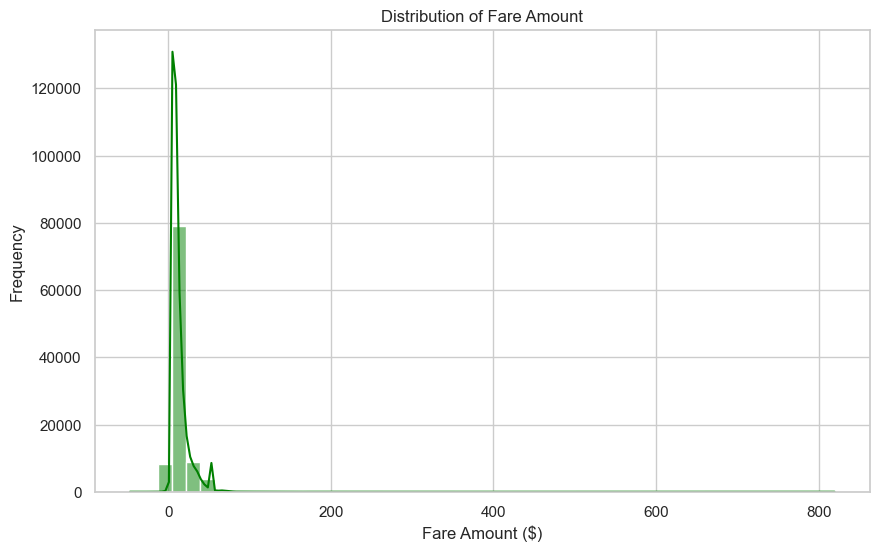

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 3. Number of Trips by Hour of the Day (Pickup)

C:\Users\aparu\AppData\Local\Temp\ipykernel_24580\2890664799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pick_hour', data=datetime_dim, palette='viridis')


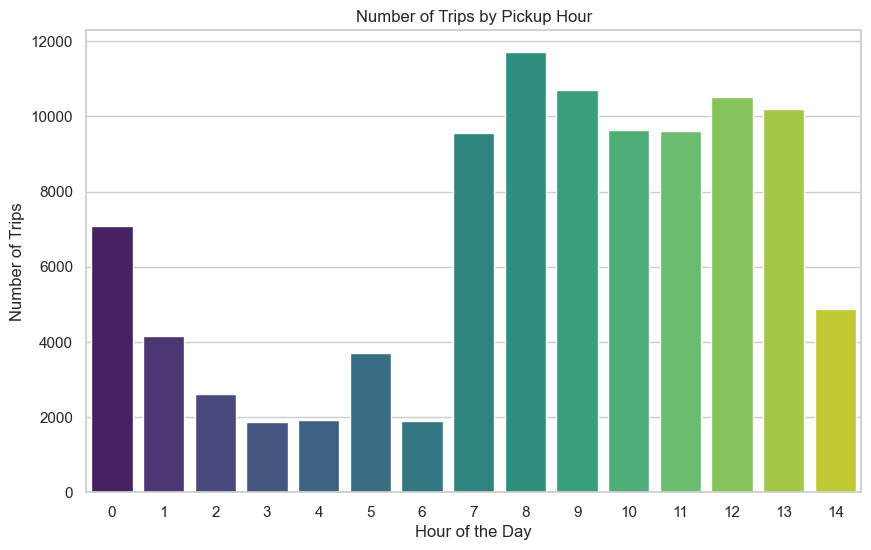

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pick_hour', data=datetime_dim, palette='viridis')
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
# 4. Number of Trips by Day of the Week (Pickup)

C:\Users\aparu\AppData\Local\Temp\ipykernel_24580\767790469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pick_weekday', data=datetime_dim, palette='magma')


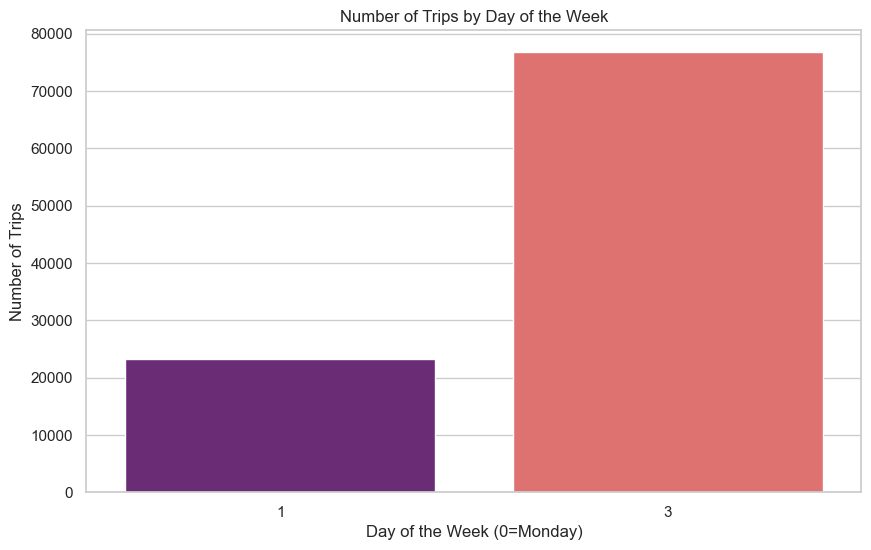

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pick_weekday', data=datetime_dim, palette='magma')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
# 5. Number of Passengers per Trip Distribution

C:\Users\aparu\AppData\Local\Temp\ipykernel_24580\804119734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=passenger_count_dim, palette='coolwarm')


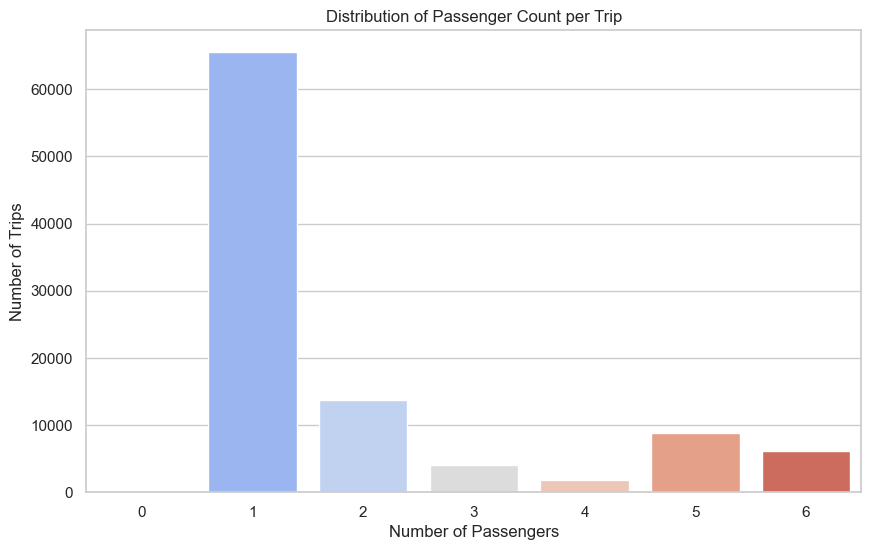

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=passenger_count_dim, palette='coolwarm')
plt.title('Distribution of Passenger Count per Trip')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()